In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
psdf = pd.read_csv("co2_emissions_canada.csv")

In [3]:
psdf

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,8.5,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,9.6,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,5.9,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,11.1,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,10.6,244
...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,9.4,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,9.9,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,10.3,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,9.9,232


In [4]:
psdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 8   CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 519.4+ KB


In [5]:
psdf.describe(include="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Make,7385,42,FORD,628,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Model,7385,2053,F-150 FFV 4X4,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vehicle Class,7385,16,SUV - SMALL,1217,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine Size(L),7385.0,NaN,NaN,NaN,3.160068,1.35417,0.9,2.0,3.0,3.7,8.4
Cylinders,7385.0,NaN,NaN,NaN,5.61503,1.828307,3.0,4.0,6.0,6.0,16.0
Transmission,7385,27,AS6,1324,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fuel Type,7385,5,X,3637,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fuel Consumption Comb (L/100 km),7385.0,NaN,NaN,NaN,10.975071,2.892506,4.1,8.9,10.6,12.6,26.1
CO2 Emissions(g/km),7385.0,NaN,NaN,NaN,250.584699,58.512679,96.0,208.0,246.0,288.0,522.0


In [47]:
a = sorted(list(psdf['Engine Size(L)']))
n = len(a)
print(n/2)
a[(n//2)+1]

3692.5


3.0

In [38]:
np.median(psdf['Engine Size(L)'])

3.0

In [7]:
a = list(psdf['Fuel Type'].unique())
b = []
for i in range(len(a)):
    b.append("{} : {}".format(a[i],list(psdf['Fuel Type']).count(a[i])))
b

['Z : 3202', 'D : 175', 'X : 3637', 'E : 370', 'N : 1']

# Question 2 : What is the average fuel consumption for regular gasoline (Fuel Type = X), premium gasoline (Z), ethanol (E), and diesel (D)?

In [23]:
psdf[psdf['Fuel Type'] == 'N']

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
2439,CHEVROLET,IMPALA DUAL FUEL,MID-SIZE,3.6,6,AS6,N,12.7,213


In [48]:
fTdf = psdf.groupby('Fuel Type').agg(np.average).reset_index(drop=False)
fTdf = fTdf[fTdf['Fuel Type'] != 'N'].sort_values(ascending=True, by='Fuel Consumption Comb (L/100 km)')[['Fuel Type','Fuel Consumption Comb (L/100 km)']]
fTdf

C:\Users\apal6\AppData\Local\Temp\ipykernel_19288\1442872963.py:1: FutureWarning: ['Make', 'Model', 'Vehicle Class', 'Transmission'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  fTdf = psdf.groupby('Fuel Type').agg(np.average).reset_index(drop=False)


,Fuel Type,Fuel Consumption Comb (L/100 km)
0,D,8.835429
3,X,10.084575
4,Z,11.422767
1,E,16.861351


# What is the correlation between fuel consumption and CO2 emissions?

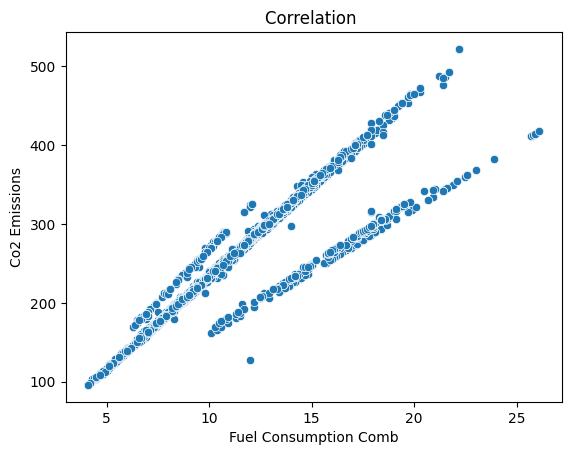

In [9]:
sns.scatterplot(data=psdf,x='Fuel Consumption Comb (L/100 km)',y='CO2 Emissions(g/km)').set(xlabel ="Fuel Consumption Comb", ylabel = "Co2 Emissions", title ='Correlation ')
plt.show()

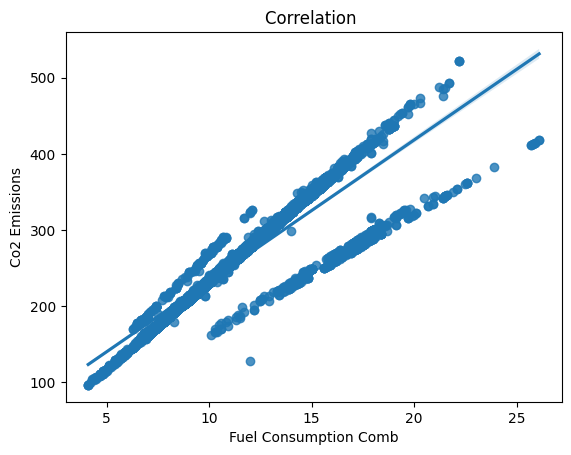

In [10]:
sns.regplot(data=psdf,x='Fuel Consumption Comb (L/100 km)',y='CO2 Emissions(g/km)').set(xlabel ="Fuel Consumption Comb", ylabel = "Co2 Emissions", title ='Correlation ')
plt.show()

In [11]:
round(psdf['Fuel Consumption Comb (L/100 km)'].corr(psdf['CO2 Emissions(g/km)']),2)

0.92

# Which vehicle class has lower average CO2 emissions, 'SUV - SMALL' or 'MID-SIZE'?

In [12]:
lCo2Emi = psdf.sort_values(ascending=False,by="Vehicle Class")
lCo2Emi = lCo2Emi[lCo2Emi['Vehicle Class'].isin(["MID-SIZE","SUV - SMALL"])]
lCo2Emi

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
2825,JEEP,RENEGADE 4X4,SUV - SMALL,1.4,4,M6,X,8.8,203
2817,JEEP,PATRIOT,SUV - SMALL,2.4,4,A6,X,10.0,235
2824,JEEP,RENEGADE FFV,SUV - SMALL,2.4,4,A9,E,12.2,201
2823,JEEP,RENEGADE FFV,SUV - SMALL,2.4,4,A9,X,9.4,220
2822,JEEP,RENEGADE,SUV - SMALL,1.4,4,M6,X,8.8,207
...,...,...,...,...,...,...,...,...,...
604,KIA,FORTE,MID-SIZE,1.8,4,M6,X,8.0,184
606,KIA,FORTE,MID-SIZE,2.0,4,M6,X,8.4,193
2530,DODGE,DART FFV,MID-SIZE,2.0,4,A6,X,8.6,201
840,NISSAN,ALTIMA,MID-SIZE,2.5,4,AV,X,7.6,175


In [13]:
MSco2 = lCo2Emi[lCo2Emi['Vehicle Class'].isin(["MID-SIZE"])]
SSco2 = lCo2Emi[lCo2Emi['Vehicle Class'].isin(["SUV - SMALL"])]

In [14]:
MSco2

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
5490,AUDI,A7 quattro,MID-SIZE,3.0,6,AM7,Z,9.6,224
5499,AUDI,RS 5 Sportback,MID-SIZE,2.9,6,AS8,Z,11.5,268
5185,MINI,COOPER CLUBMAN ALL4,MID-SIZE,1.5,3,M6,Z,9.1,214
6923,HONDA,Civic Sedan Si,MID-SIZE,1.5,4,M6,Z,7.8,183
1948,NISSAN,ALTIMA,MID-SIZE,3.5,6,AV,X,9.0,207
...,...,...,...,...,...,...,...,...,...
604,KIA,FORTE,MID-SIZE,1.8,4,M6,X,8.0,184
606,KIA,FORTE,MID-SIZE,2.0,4,M6,X,8.4,193
2530,DODGE,DART FFV,MID-SIZE,2.0,4,A6,X,8.6,201
840,NISSAN,ALTIMA,MID-SIZE,2.5,4,AV,X,7.6,175


In [15]:
SSco2

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
2825,JEEP,RENEGADE 4X4,SUV - SMALL,1.4,4,M6,X,8.8,203
2817,JEEP,PATRIOT,SUV - SMALL,2.4,4,A6,X,10.0,235
2824,JEEP,RENEGADE FFV,SUV - SMALL,2.4,4,A9,E,12.2,201
2823,JEEP,RENEGADE FFV,SUV - SMALL,2.4,4,A9,X,9.4,220
2822,JEEP,RENEGADE,SUV - SMALL,1.4,4,M6,X,8.8,207
...,...,...,...,...,...,...,...,...,...
7307,SUBARU,Outback AWD,SUV - SMALL,2.5,4,AV8,X,8.2,192
545,INFINITI,QX70 AWD,SUV - SMALL,5.0,8,AS7,Z,14.5,334
569,JEEP,CHEROKEE,SUV - SMALL,2.4,4,A9,X,9.5,218
571,JEEP,CHEROKEE 4X4,SUV - SMALL,2.4,4,A9,X,10.0,230


In [16]:
np.mean(MSco2['CO2 Emissions(g/km)'])

222.45542806707854

In [17]:
np.mean(SSco2['CO2 Emissions(g/km)'])

236.29252259654888

# What are the average CO2 emissions for all vehicles?

In [19]:
np.mean(psdf['CO2 Emissions(g/km)'])

250.58469871360867

# For vehicles with an engine size of 2.0 liters or smaller?

In [20]:
np.mean((psdf[psdf['Engine Size(L)'] <= 2])['CO2 Emissions(g/km)'])

198.26783530370975

In [39]:
round(3.160068,2)

3.16